In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
from sklearn import tree

# First step into machine learning beyond classic regression

In [3]:
# Warm Up
R1 = np.array([5,8,9])
R2 = np.array([1,0,20])

Calculate the a) Gini co-efficient and b) entropy for R1. Then, write a function that takes in a normalized vector and outputs the Gini co-efficent and Entropy.

Calculate the weighted sums.

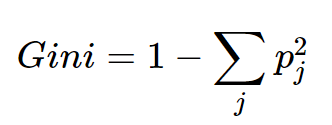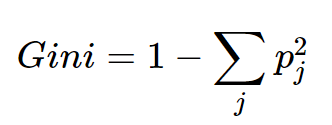

In [14]:
sorted_array = np.sort(R1)
n = len(sorted_array)
cumulative_sum = np.cumsum(sorted_array)
gini_index = 1 - 2 * np.sum((n + 1 - np.arange(1, n + 1)) * sorted_array) / (n * np.sum(sorted_array))

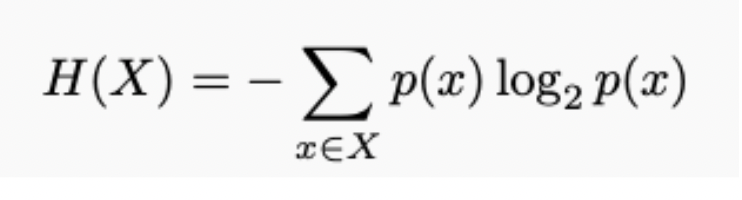

In [20]:
sorted_array = np.sort(R1)
n = len(sorted_array)
cumulative_sum = np.cumsum(sorted_array)
    entropy = -np.sum(probabilities * np.log2(probabilities))  


In [158]:
## Prof code 

R1

array([5, 8, 9])

In [164]:
R1_norm = R1 / R1.sum()
R2_norm = R2 / R2.sum()

G = lambda x: 1 - (x**2).sum()
H = lambda x: - (np.log(x, where = x!=0)).sum()

G(R1_norm), H(R1_norm)

(0.6487603305785123, 3.387023328624792)

In [30]:
def gini_and_entropy(array):
    sorted_array = np.sort(array)
    n = len(sorted_array)
    cumulative_sum = np.cumsum(sorted_array)
    gini_index = 1 - 2 * np.sum((n + 1 - np.arange(1, n + 1)) * sorted_array) / (n * np.sum(sorted_array))


    values, counts = np.unique(array, return_counts=True)
    probabilities = counts / np.sum(counts)
    entropy = -np.sum(probabilities * np.log2(probabilities))  
    
    return gini_index, entropy
R1_gini_index, R1_entropy = gini_and_entropy(R1)
R2_gini_index, R2_entropy = gini_and_entropy(R2)
(R1_gini_index, R1_entropy ), (R2_gini_index, R2_entropy)

((-0.21212121212121215, 1.584962500721156),
 (0.3015873015873016, 1.584962500721156))

# Decision Trees

Here, we will implement once again the titanic dataset.

In [31]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

There are missing values for age. Replace the nans with the median age.

In [34]:
# your code
titanic.age.fillna(titanic.age.median(), inplace = True)

Drop the following columns: 'who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive'

In [36]:

# your code
titanic.drop(columns = ['who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive'], inplace = True)

Using label_encoder, transform the dataset into integer encodings.

In [38]:
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

titanic['sex'] = label_encoder.fit_transform(titanic['sex'])  # Male: 1, Female: 0
titanic['class'] = label_encoder.fit_transform(titanic['class'])  # 1st, 2nd, 3rd -> 0, 1, 2
titanic['alone'] = label_encoder.fit_transform(titanic['alone'])

# Set-up your training by specifying X and y

Use train_test_split to split the data and train.

In [39]:
titanic

,survived,pclass,sex,age,sibsp,class,adult_male,alone
0,0,3,1,22.0,1,2,True,0
1,1,1,0,38.0,1,0,False,0
2,1,3,0,26.0,0,2,False,1
3,1,1,0,35.0,1,0,False,0
4,0,3,1,35.0,0,2,True,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,1,True,1
887,1,1,0,19.0,0,0,False,1
888,0,3,0,28.0,1,2,False,0
889,1,1,1,26.0,0,0,True,1


In [147]:
# Define features (X) and target (y)
X = titanic.loc[:, titanic.columns != 'survived']
y = titanic.drop(columns = X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (712, 7), Test set shape: (179, 7)


In [148]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=2)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

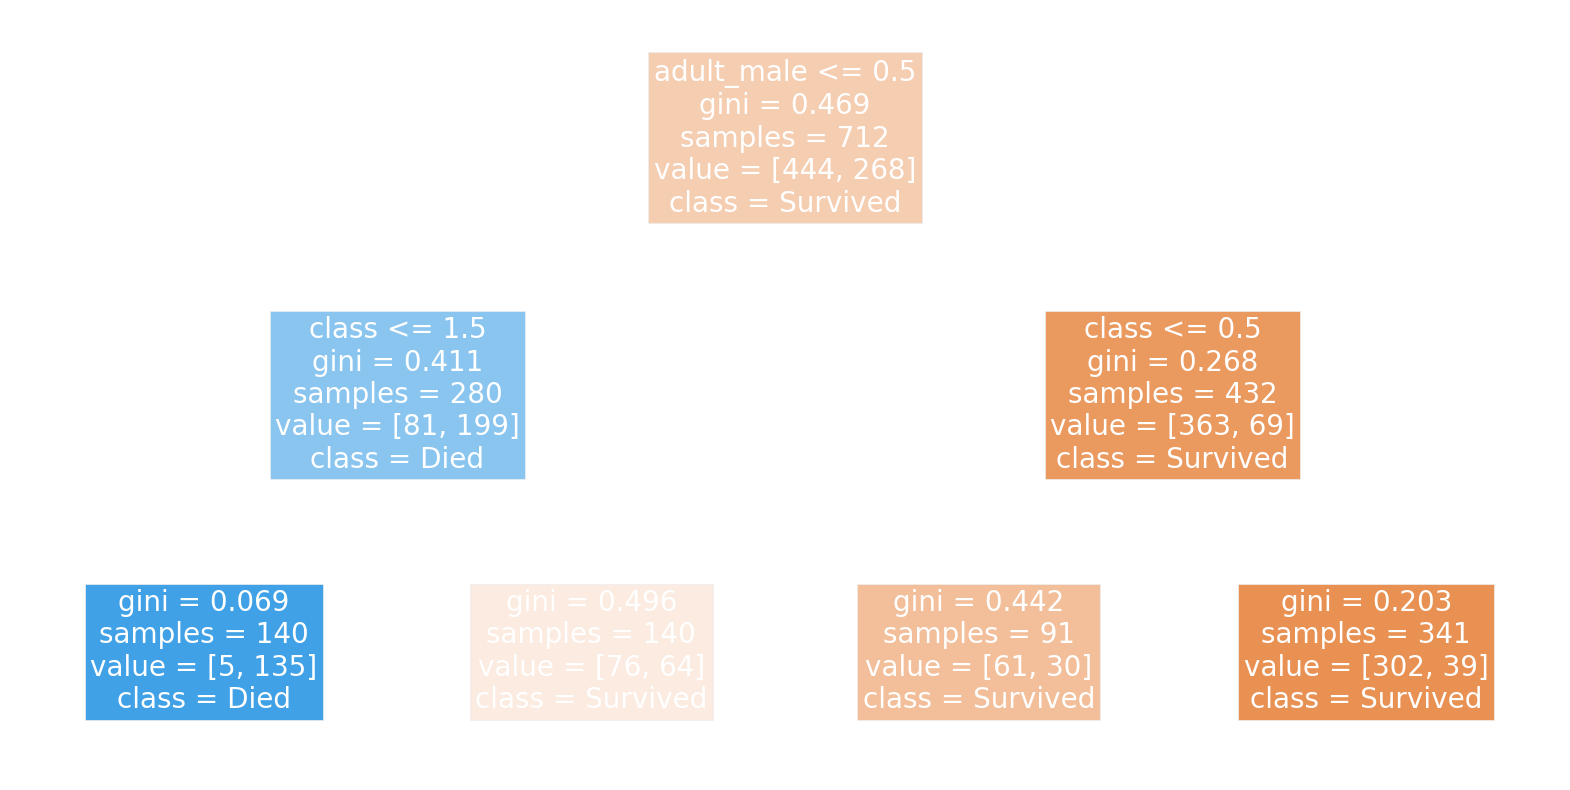

In [149]:
plt.figure(figsize=(20,10))


tree.plot_tree(decision_tree, 
                   feature_names=X.columns,  
                   class_names=["Survived", "Died"],
                   filled=True, max_depth=3,fontsize=20,
      )
print("")

### Evaluating your results
Now that you have your predicted values and actual values, plot a scatter plot and give the R2. What do you see?

<Axes: xlabel='survived'>

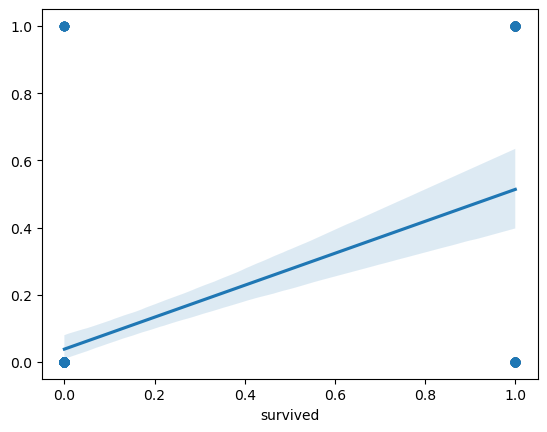

In [80]:
sns.regplot(x = y_test.survived, y = y_pred_dt)


Calculate the accuracy, recall, and precision. Then, use the function confusion_matrix and sns.heatmap to plot a confusion matrix.

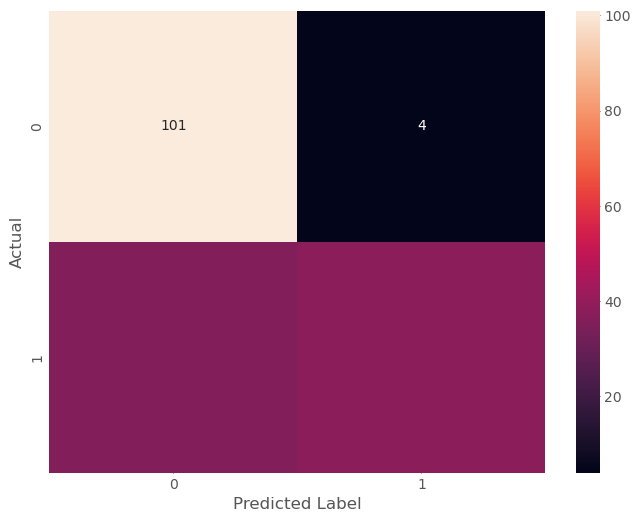

In [124]:

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual')
plt.show()


### Change the cost criterion from Gini to entropy
Does this change the performance metric?

In [127]:
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=2)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
                   feature_names=X,  
                   class_names=["Survived", "Died"],
                   filled=True, max_depth=3,fontsize=20,
      )
print("")

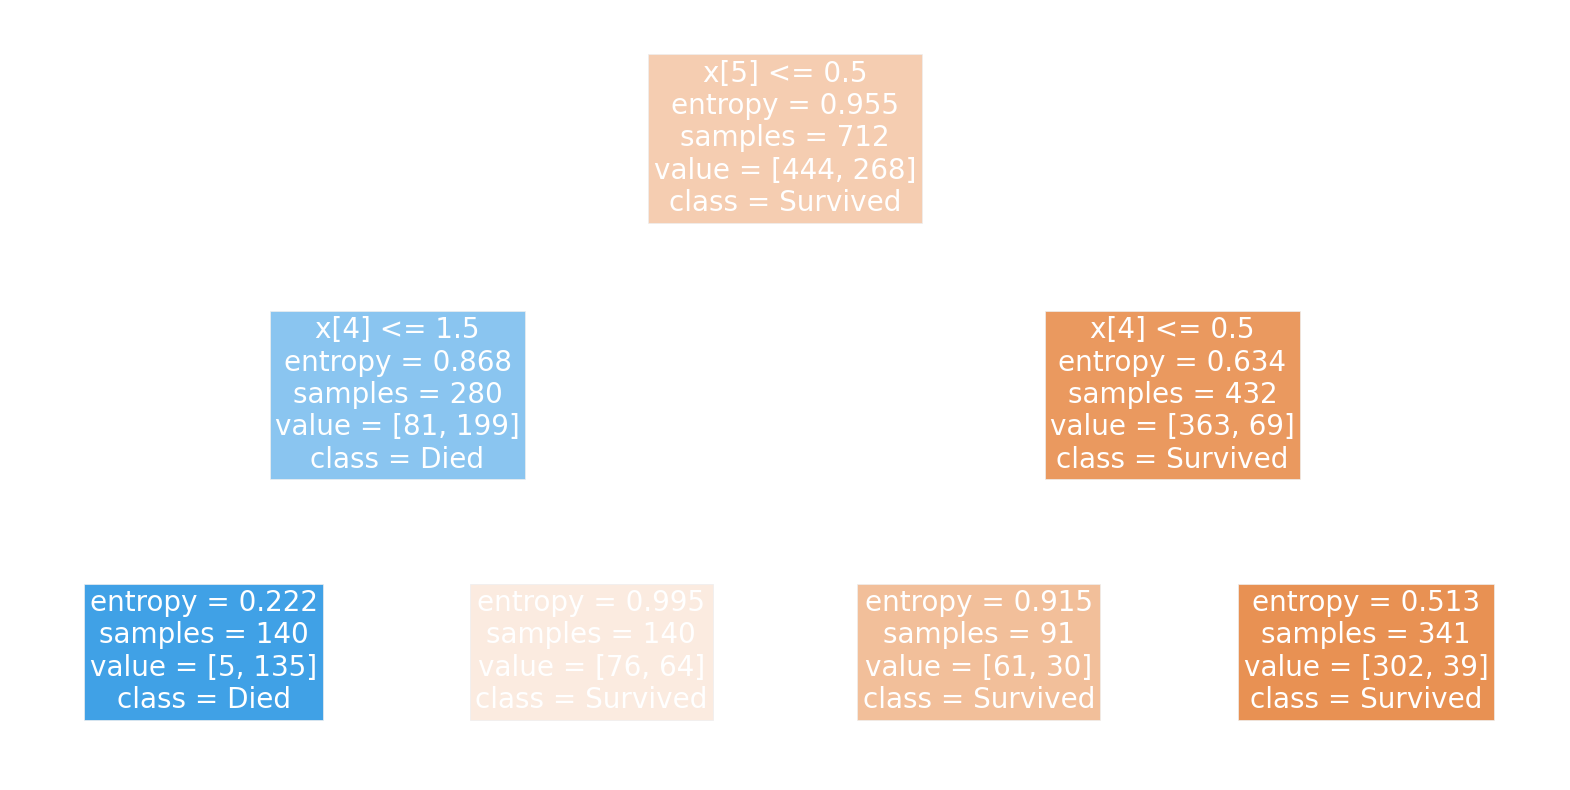

In [150]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy',max_depth=2)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

plt.figure(figsize=(20,10))


tree.plot_tree(decision_tree, 
                   feature_names=None,  
                   class_names=["Survived", "Died"],
                   filled=True, max_depth=3,fontsize=20,
      )
print("")

### Hyperparameter tuning: How does performance change with increased max depth?
Write code that increases the max depth from 1 to 5, then plot on one figure how this impacts the accuracy, recall, and precision.

In [156]:
scores = []
from sklearn.metrics import accuracy_score,recall_score, precision_score
def max_depth():
    for i in range(1,5):
        decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=i)
        decision_tree.fit(X_train, y_train)
        
        y_pred_dt = decision_tree.predict(X_test)
        recall = recall_score(y_test, y_pred_dt)
        accuracy = accuracy_score(y_test, y_pred_dt)
        precision = precision_score(y_test, y_pred_dt)
        
        scores.append((recall, accuracy, precision))
    return scores

scores = max_depth()

In [157]:
scores

[(0.7432432432432432, 0.7877094972067039, 0.7432432432432432),
 (0.5135135135135135, 0.776536312849162, 0.9047619047619048),
 (0.7432432432432432, 0.8100558659217877, 0.7857142857142857),
 (0.7432432432432432, 0.8100558659217877, 0.7857142857142857)]

# Random Forest

Use the function RandomForestClassifier to train a classifier. 

In [ ]:
%%time
# Your Code

How does this compare to the decision tree?

## Grid search: Choose 10 values for n_estimators and 10 values for max_depth
#### Plot a heatmap that shows the grid search on these values

# Practice with a larger, multilabeled dataset

Seven types of tree cover:
* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
    'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
    'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
    'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
    'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
    'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
    'Cover_Type'
]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)


Split the data like above, train a decision tree and RF model, then compare the two.